In [4]:
import math
import pickle
import networkx as nx

In [5]:
exp = 'epi_f100_maf0.4_0.1'

In [6]:
objects = []
with (open('pipeline/lcsdive/'+exp+'/output/lcs_dive/Composite/rulepop/networkpickle', 'rb')) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [7]:
obj = objects[0]

In [8]:
(acc_spec_dict, edge_list, weight_list, pos) = obj

In [9]:
G = nx.Graph()
for i in range(len(edge_list)):
    G.add_edge(edge_list[i][0], edge_list[i][1], weight=weight_list[i])
pos = nx.spring_layout(G, k=1)

{'M0P5': Text(-0.06714411133601546, 0.01804934755948614, 'M0P5'),
 'M0P6': Text(-0.09484984455092851, -0.014896771363329139, 'M0P6'),
 'N95': Text(-0.16657337709655498, -0.10487160942775342, 'N95'),
 'N9': Text(-0.17266997282242988, 0.026630357751652515, 'N9'),
 'N20': Text(-0.16982253533852254, 0.15419881247965483, 'N20'),
 'N0': Text(-0.17842722234074201, -0.024752117859304475, 'N0'),
 'N11': Text(0.01821203136169023, 0.005911571645954719, 'N11'),
 'N7': Text(0.05229191689339066, 0.04472527126524216, 'N7'),
 'N84': Text(-0.11236834202104537, -0.09984286948290741, 'N84'),
 'N21': Text(0.055579410612301525, -0.06027792065573266, 'N21'),
 'N22': Text(-0.28958041151580616, 0.04360629030679548, 'N22'),
 'N96': Text(-0.09683985188670124, 0.16582034727039968, 'N96'),
 'N65': Text(-0.0013804684827937563, -0.14874806393859102, 'N65'),
 'N3': Text(-0.29450935323455674, -0.06542554753720521, 'N3'),
 'N90': Text(-0.25064796202391976, -0.0537667757573807, 'N90'),
 'N5': Text(-0.2665114523035976, 

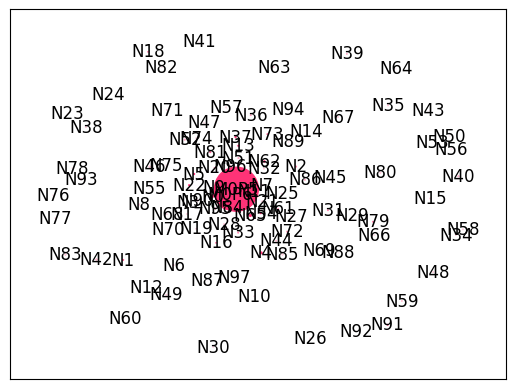

In [10]:
max_node_value = max(acc_spec_dict.values())
for i in acc_spec_dict:
    acc_spec_dict[i] = math.pow(acc_spec_dict[i] / max_node_value, 3) * 1000  # Cubic Node Size Function

max_weight_value = max(weight_list)
for i in range(len(weight_list)):
    weight_list[i] = math.pow(weight_list[i] / max_weight_value, 3) * 10  # Cubic Weight Function

nx.draw_networkx_nodes(G, pos=pos, nodelist=acc_spec_dict.keys(), node_size=[v * 1 for v in acc_spec_dict.values()], node_color='#FF3377')
nx.draw_networkx_edges(G, pos=pos, edge_color='#E0B8FF', edgelist=edge_list, width=[v * 1 for v in weight_list])
nx.draw_networkx_labels(G, pos=pos)

In [11]:
nx.write_gexf(G, 'output/Figure6.gexf')